In [1]:
import os
cwd = os.getcwd()

In [40]:
os.chdir(os.path.join(cwd,'../..'))
import ExMAS.main
import ExMAS.utils
import ExMAS.corona

In [41]:
from ExMAS.utils import inData as inData

In [42]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import pandas as pd
pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.3f}'.format
import numpy as np
from math import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import json
from scipy.stats import *


import pprint

In [44]:
plt.rcParams['figure.figsize'] = [16, 4]
plt.rcParams["font.family"] = "Helvetica"
plt.style.use('ggplot')
colors = sns.color_palette("muted")

---
params

In [95]:
params = ExMAS.utils.get_config('ExMAS/data/configs/corona.json')  # configuration, including shareability parameters (to reproduce utility)
params.nP = 4000
params.simTime = 4
params.corona.initial_share = 0.05  # initial probability of being infected
params.corona.time_threshold = 60  # minimal time of travelling together to infect
params.corona.infected_prior = 3  # minimal time of travelling together to infect
params.corona.time_to_quarantine = 6  # minimal time of travelling together to infect
params.corona.participation = 0.5
params.corona.p = 0.8
params.multi_platform_matching = True
params.corona.one = False
params.corona.big = True  # small set of 300 trips to test and big of 3000 for proper experiments

In [96]:
params.t0 = '15:00'
ExMAS.utils.save_config(params, path = 'ExMAS/data/configs/corona.json')

In [102]:
from ExMAS.utils import inData as inData

params = ExMAS.utils.get_config('ExMAS/data/configs/corona.json')
params.nP = 200
params = ExMAS.utils.make_paths(params)

params.t0 = pd.Timestamp.now()



inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the CITY graph

inData = ExMAS.utils.generate_demand(inData, params)

inData.passengers['platforms'] = inData.passengers.apply(lambda x: [0], axis=1)
inData.requests['platform'] = inData.requests.apply(lambda row: inData.passengers.loc[row.name].platforms[0],
                                                    axis=1)
inData.sblts.requests['platform'] = inData.requests['platform']
params.without_matching = True

inData = ExMAS.main(inData, params)



16-07-20 16:58:57-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
16-07-20 16:58:57-INFO-creating combinations
16-07-20 16:58:57-INFO-39800	 nR*(nR-1)
16-07-20 16:58:57-INFO-Reduction of feasible pairs by 99.87%
16-07-20 16:58:57-INFO-Degree 2 	Completed
16-07-20 16:58:57-INFO-trips to extend at degree 2 : 122
16-07-20 16:58:58-INFO-At degree 2 feasible extensions found out of 0 searched
16-07-20 16:58:58-INFO-Degree 3 	Completed
16-07-20 16:58:58-INFO-No more trips to exted at degree 3


day 1
16-07-20 16:59:59-INFO-Matching 107 trips to 146 rides in order to minimize u_veh
16-07-20 16:59:59-INFO-Problem solution: Optimal. 
Total costs for single trips:         34,597 
reduced by matching to:               32,764
Re matching, 0 travellers quarantined, 92 inactive today. 322 out of 322 rides remain feasible
day 2
16-07-20 17:00:00-INFO-Matching 96 trips to 133 rides in order to minimize u_veh
16-07-20 17:00:00-INFO-Problem solution: Optimal. 
Total costs for single trips:         32,239 
reduced by matching to:               30,511
Re matching, 0 travellers quarantined, 103 inactive today. 322 out of 322 rides remain feasible
day 3
16-07-20 17:00:00-INFO-Matching 99 trips to 141 rides in order to minimize u_veh
16-07-20 17:00:00-INFO-Problem solution: Optimal. 
Total costs for single trips:         32,630 
reduced by matching to:               30,361
Re matching, 0 travellers quarantined, 100 inactive today. 322 out of 322 rides remain feasible
day 4
16-07-20 17:00:01-I

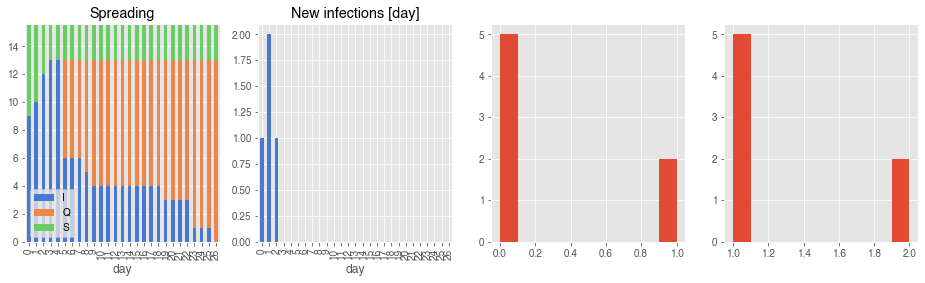

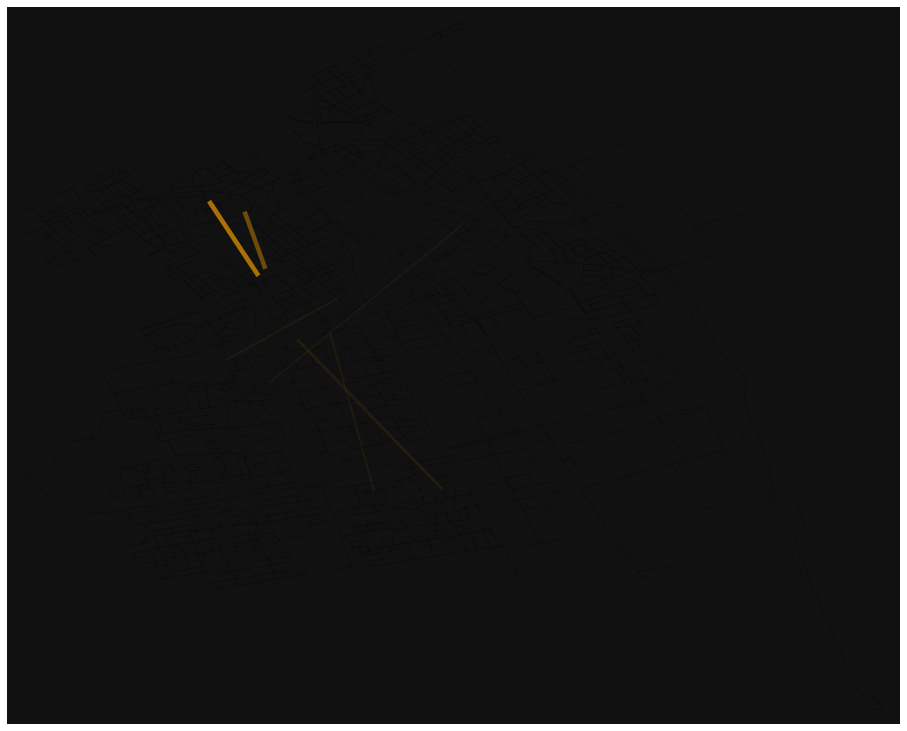

In [104]:
inData = ExMAS.corona.evolve(inData, params, _print=False, _plot = True)  # <---- MAIN

In [93]:
inData.passengers.groupby('active_today').size()

active_today
False    2015
True     1985
dtype: int64

In [88]:
inData.passengers.groupby('active').size()

active
True    4000
dtype: int64

In [11]:
inData = ExMAS.main(inData, params)

16-07-20 15:49:28-INFO-Initializing pairwise trip shareability between 200 and 200 trips.
16-07-20 15:49:28-INFO-creating combinations
16-07-20 15:49:29-INFO-39800	 nR*(nR-1)
16-07-20 15:49:30-INFO-Reduction of feasible pairs by 99.34%
16-07-20 15:49:30-INFO-Degree 2 	Completed
16-07-20 15:49:30-INFO-trips to extend at degree 2 : 694
16-07-20 15:49:31-INFO-At degree 2 feasible extensions found out of 88 searched
16-07-20 15:49:31-INFO-Degree 3 	Completed
16-07-20 15:49:31-INFO-trips to extend at degree 3 : 88
16-07-20 15:49:31-INFO-At degree 3 feasible extensions found out of 7 searched
16-07-20 15:49:31-INFO-Degree 4 	Completed
16-07-20 15:49:31-INFO-trips to extend at degree 4 : 7
16-07-20 15:49:31-INFO-At degree 4 feasible extensions found out of 0 searched
16-07-20 15:49:31-INFO-Degree 5 	Completed
16-07-20 15:49:31-INFO-No more trips to exted at degree 5
16-07-20 15:49:32-INFO-Matching 200 trips to 989 rides in order to minimize u_veh
16-07-20 15:49:33-INFO-Problem solution: Optim

### initially infected population
(one realization)

### Infecting - single day

infected traveller '43' travelled with two other travellers (`191` and `215`)
they travel together and `43` infects them

In [8]:
infector = inData.population.query('state == "I"').iloc[10]
infector.to_frame().T

,state,infection_day,infected_by
190,I,-3.000,None


In [10]:
for i, ride in schedule.iterrows():
    if infector.name in ride.indexes:
        r = ride.name
        break
travellers = schedule.loc[r]
travellers.to_frame().T

,Unnamed: 0,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,selected
1686,33285,"[190, 258]",7.750,529,21,"[5.2164, 2.5336499999999997]","[374.0, 102, 194, 223]","[190, 258]","[258, 190]",2.000,NaN,0.020,540,1


In [11]:
inData = infect(inData, day = 0, params = params)

In [12]:
inData.population.loc[travellers.indexes]

,state,infection_day,infected_by
190,I,-3.000,None
258,I,0.000,190.000


### Evolution

day 1
day 2
day 3
day 4
day 5
day 6
day 7
day 8
day 9
day 10
day 11
day 12
day 13
day 14
day 15
day 16
day 17
day 18
day 19
day 20
day 21
day 22
day 23
day 24
day 25
day 26
day 27


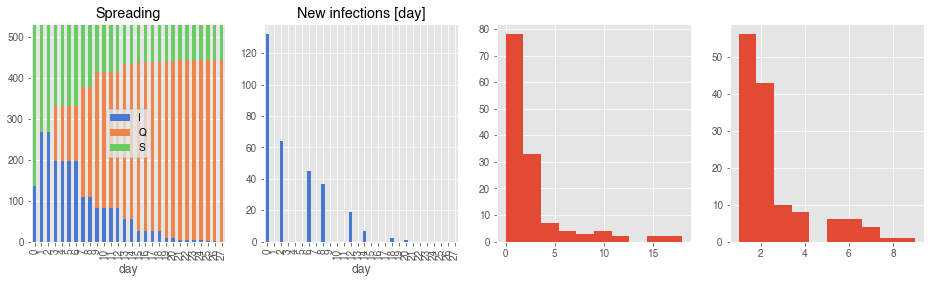

In [80]:
params.corona.one = False
inData.sblts.rides = rides
inData.requests = requests
inData.sblts.requests = requests
inData.sblts.schedule = schedule
params.corona.infected_prior = 3
inData = evolve(inData, params, _print = False, _plot = True)